# Python assignment

The python assignment you can do either on your own or with one other student (i.e. max group size is 2 students).

The first cell of your notebook, should contain a table with the names and ANRs of the group members, like so

|Name|examnr.|
|----|-------|
|Mischa Kroes|878692|
|Jouke Bonthuis|264556|



See [the webpage](https://janboone.github.io/applied-economics/assignment3.html) for details of what we expect to see in this assignment.

# Aim

For this project, we aim to use Python to explain differences in development between countries. Countries differ from each other from many different aspects and this results in different outcomes for the countries’ development. When using Python, we hope to highlight some of these important differences which might be beneficial for growth. Finding factors which contribute positively to the well being of a country, is a way in which we can use Python to find relevant policy proposals or focus points for governments.

# Method

To do this with Python, we use data from the World Bank which is loaded in the first cell. In the second cell we load some important indicators which tell us a lot about the development of countries which we will use later on. To illustrate, it contains indicators such as education, gender statistics, sustainable development goals and world development indicators. In the third cell we load a set of countries to be used in the Python research. In the cell all countries and country groups are loaded. However, in the research we will only be using European countries for reasons of clarity and comparability. We will use indicators related to 'Doing business' to explain differences in economic development. Firstly, we will obtain the correct data and inspect the different components. Secondly, we will try to visualize some relationships by creating a scatter plot and later on we create a correlation matrix. Thirdly, we run a regression to help us draw conclusions about economic development and strength of institutions in Europe. Lastly, we will discuss what these results might imply regarding economic or legal policies.


In [1]:
import wbdata #We are using the World Bank database
import pandas as pd #We need pandas to process the raw data
import numpy as np #Numpy is used to perform calculations
import matplotlib.pyplot as plt #Needed for creating graphs
from pandas import DataFrame, Series #We use a time series of data
from pylab import * 
pd.set_option ('display.max_columns', None) #We want all the columns to be visible

In [2]:
wbdata.get_source() #Searching for the right variable list

11	Africa Development Indicators
36	Statistical Capacity Indicators
31	Country Policy and Institutional Assessment
41	Country Partnership Strategy for India (FY2013 - 17)
1 	Doing Business
30	Exporter Dynamics Database – Indicators at Country-Year Level
12	Education Statistics
13	Enterprise Surveys
28	Global Financial Inclusion
33	G20 Financial Inclusion Indicators
14	Gender Statistics
15	Global Economic Monitor
27	Global Economic Prospects
32	Global Financial Development
21	Global Economic Monitor Commodities
55	Commodity Prices- History and Projections
34	Global Partnership for Education
29	The Atlas of Social Protection: Indicators of Resilience and Equity
16	Health Nutrition and Population Statistics
39	Health Nutrition and Population Statistics by Wealth Quintile
40	Population estimates and projections
18	IDA Results Measurement System
45	Indonesia Database for Policy and Economic Research
6 	International Debt Statistics
54	Joint External Debt Hub
25	Jobs
37	LAC Equity Lab
19	Mil

In [3]:
wbdata.search_countries('') #Searching for the country codes

ABW	Aruba
AFG	Afghanistan
AFR	Africa
AGO	Angola
ALB	Albania
AND	Andorra
ANR	Andean Region
ARB	Arab World
ARE	United Arab Emirates
ARG	Argentina
ARM	Armenia
ASM	American Samoa
ATG	Antigua and Barbuda
AUS	Australia
AUT	Austria
AZE	Azerbaijan
BDI	Burundi
BEA	East Asia & Pacific (IBRD-only countries)
BEC	Europe & Central Asia (IBRD-only countries)
BEL	Belgium
BEN	Benin
BFA	Burkina Faso
BGD	Bangladesh
BGR	Bulgaria
BHI	IBRD countries classified as high income
BHR	Bahrain
BHS	Bahamas, The
BIH	Bosnia and Herzegovina
BLA	Latin America & the Caribbean (IBRD-only countries)
BLR	Belarus
BLZ	Belize
BMN	Middle East & North Africa (IBRD-only countries)
BMU	Bermuda
BOL	Bolivia
BRA	Brazil
BRB	Barbados
BRN	Brunei Darussalam
BSS	Sub-Saharan Africa (IBRD-only countries)
BTN	Bhutan
BWA	Botswana
CAA	Sub-Saharan Africa (IFC classification)
CAF	Central African Republic
CAN	Canada
CEA	East Asia and the Pacific (IFC classification)
CEB	Central Europe and the Baltics
CEU	Europe and Central Asia (IFC classificati

In [4]:
wbdata.get_indicator(source=1) #Searching for the relevant variables

IC.WRH.PROC            	Procedures to build a warehouse (number)
IC.WRH.DURS            	Time required to build a warehouse (days)
IC.TAX.TOTL.CP.ZS      	Total tax rate (% of commercial profits)
IC.TAX.PRFT.CP.ZS      	Profit tax (% of commercial profits)
IC.TAX.PFI             	Postfiling index (0-100)
IC.TAX.PAYM            	Tax payments (number)
IC.TAX.OTHR.CP.ZS      	Other taxes payable by businesses (% of commercial profits)
IC.TAX.LABR.CP.ZS      	Labor tax and contributions (% of commercial profits)
IC.TAX.DURS            	Time to prepare and pay taxes (hours)
IC.RP.QLAI             	Quality of the land administration index (0-30)
IC.RP.COST             	Cost to register property (% of property value)
IC.REG.PROC.WOMEN      	Procedures required to start a business - Women (number)
IC.REG.PROC            	Start-up procedures to register a business (number)
IC.REG.DURS.WOMEN      	Time required to start a business - Women (days)
IC.REG.DURS            	Time required to start a b

# Data

In the fourth cell we load the statistics of the country which are probably the most important for our research as they tell us a lot about the strength of institutions and overall economic efficiency. Indicators such as ‘time required to start a business’, ‘procedures to register property’, ‘extent of shareholder rights’ and ‘cost to enforce a contract’ are all indicators which reflect a country’s economic efficiency and strength of institutions very well. The reason why we chose these indicators is that these are factors that can be improved by governments and therefore the policy implications of our Python research are very relevant. 

Then, in the cell below, we load data related to GDP, GDP per capita and their growth. This data is important because later we will use these data as dependent variables or as the variable we would like to explain with our other Python data. For reasons of clarity, we limit the timeframe of our data to the period between 1990 and 2017 in cell 6. 

In [5]:
wbdata.search_indicators('GDP growth')

6.0.GDP_growth      	GDP growth (annual %)
5.51.01.10.gdp      	Per capita GDP growth
NV.AGR.TOTL.ZG      	Real agricultural GDP growth rates (%)
NY.GDP.MKTP.KN.87.ZG	GDP growth (annual %)
NY.GDP.MKTP.KD.ZG   	GDP growth (annual %)


In [6]:
data_date = (datetime.datetime(1990,1,1),datetime.datetime(2017,1,1)) #Data from 1990 untill 2017
indicators = {"NY.GDP.PCAP.PP.KD":"GDP_per_capita","NY.GDP.MKTP.KD.ZG":"GDP_growth"} #The indicators we want to use
df_wb_EUR = wbdata.get_dataframe(indicators, country=("EMU","EUU") ,data_date=data_date) #Creating a dataframe with the indicators defined above, certain countries and the desired timeframe
df_wb_complete = wbdata.get_dataframe(indicators, country=("EMU","EUU","NOR","RUS","TUR","UKR"),data_date=data_date) #Creating a dataframe with the indicators defined above, certain countries and the desired timeframe
df_wb_complete.describe() #Getting a first look at the data

,GDP_growth,GDP_per_capita
count,162.000000,162.000000
mean,1.576480,27403.321353
std,5.332959,16913.592402
min,-22.934046,4451.547944
25%,0.480836,13241.030317
50%,2.303801,24986.593604
75%,4.683684,35706.520719
max,12.100000,65083.258698


In [7]:
dfEUR = df_wb_EUR.unstack(level=0) #Unstacking the data helps to get a better overview of the data
dfCOMPLETE = df_wb_complete.unstack(level=0) 

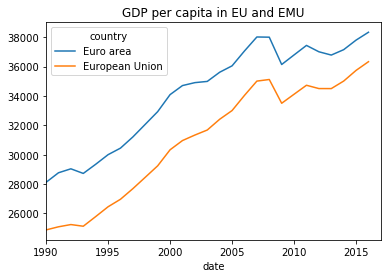

In [8]:
dfEUR['GDP_per_capita'].plot() #Creating a clear graph to visualize the data
plt.title('GDP per capita in EU and EMU')
plt.show()

# First sight

To get a feel for the data, the first step is to illustrate certain indicators for different countries or country groups. In the graph created in cell 8 we illustrate the development of 2 groups of countries, the Euro Zone and the European Union as a whole. As expected the two lines are very similar and follow the same trend. The fact that the lines are so close together can be explained by the fact that the Euro Zone countries are also considered in the data of the European Union. The level difference can mostly be explained by the fact that most of the less wealthy eastern European countries of the European Union are not yet using the Euro and therefore not considered in the category of the Euro zone. We would expect them to be almost parallel because they consist largely of the same countries and it is expected that European countries outside of the Euro Zone would also incur similar shocks.

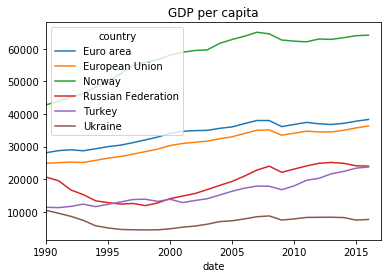

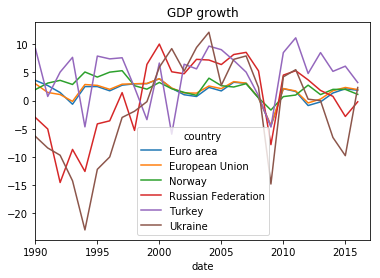

In [9]:
dfCOMPLETE['GDP_per_capita'].plot() #Again creating a clear graph to visualize the data, but this time for the complete set of countries
plt.title('GDP per capita')
dfCOMPLETE['GDP_growth'].plot() #Visualize the GDP growth over time
plt.title('GDP growth')
plt.show()

In cell 9 we dive a little bit deeper into the data to see how the countries have been developing over the past years and include European countries outside of the European Union for comparison. As expected, the Euro Zone and the European Union are almost identical when it comes to GDP growth. Norway has a GDP per capita that is far higher than the average of the European Union but as it can be seen, it’s growth rate does not differ much from the average of the European Union. More interesting results can be seen for countries with a lower GDP per capita than the average of the European Union: Russia, Ukraine and Turkey. All of the countries seem to be a lot more volatile than in terms of growth rate than the European Union. The European Union is of course a collection of countries and therefore shocks are likely to even out and result in a less volatile growth pattern. However, even when taking this into account the growth of these countries is still very volatile and a lot more volatile than for example Norway. Turkey is volatile but seems to have a high overall growth rate and Russia and Ukraine are the most volatile and alternate periods of high growth and rapid decline. This might have implications for a relation between economy development and it’s expected growth rate and growth rate volatility, something which we will investigate further in Python.

In [10]:
data_date = (datetime.datetime(1990,1,1),datetime.datetime(2016,1,1)) #Creating new dataframes with more elaborate indicators and individual countries
indicators = {"NY.GDP.PCAP.PP.KD":"GDP_per_capita","NY.GDP.MKTP.KD.ZG":"GDP_growth","IC.PI.SR":"Shareholder_rights","IC.PI.INV":"Investor_protection","IC.ISV.SOIF":"Insolvency_framework","IC.EC.COST":"Enforcement_cost","IC.BUS.DISC.XQ":"Disclosure","IC.TAX.PRFT.CP.ZS":"Profit_tax","IC.LGL.CRED.XQ":"Legal_rights","IC.PI.CT":"Corporate_transparency"}
df_wb_all = wbdata.get_dataframe(indicators, country=("AUT","BEL","BGR","CYP","CZE","DEU","DNK","ESP","EST","FIN","FRA","GBR","GRC","HRV","HUN","IRL","ITA","LVA","LUX","LTU","MLT","NLD","NOR","POL","PRT","ROU","RUS","SVK","SVN","SWE","TUR","UKR"), data_date=data_date)
df_wb_all.describe()

,Corporate_transparency,Disclosure,Enforcement_cost,GDP_growth,GDP_per_capita,Insolvency_framework,Investor_protection,Legal_rights,Profit_tax,Shareholder_rights
count,128.000000,366.000000,374.000000,826.000000,836.000000,128.000000,128.000000,128.000000,366.000000,128.000000
mean,7.093750,5.972678,21.718449,2.335419,29535.198641,11.472656,6.325000,5.531250,13.594536,7.437500
std,1.075405,2.483770,8.425822,4.059417,15323.154449,2.217778,0.744217,2.330684,7.136253,1.429443
min,5.000000,1.000000,8.800000,-22.934046,4451.547944,6.000000,4.500000,2.000000,-0.400000,4.000000
25%,6.000000,4.000000,15.000000,0.897203,19506.290555,11.000000,5.950000,3.750000,8.400000,6.750000
50%,7.000000,6.000000,19.650000,2.605345,27562.408915,12.000000,6.300000,6.000000,12.500000,8.000000
75%,8.000000,8.000000,26.900000,4.383213,37243.880281,13.000000,6.775000,7.000000,18.400000,8.000000
max,9.000000,10.000000,46.300000,25.557285,97864.195101,15.000000,7.800000,10.000000,32.400000,10.000000


In [11]:
dfALL = df_wb_all.unstack(level=0)
dfALL.drop(dfALL.index[:20], inplace=True) #Almost all indicators lack data from before 2013 and we do not want to see empty cells
dfALL.head(27) #Unstacking gives a nice and clear overview of the data per indicator per country per year

Corporate_transparency                                                 \
country                Austria Belgium Bulgaria Croatia Cyprus Czech Republic   
date                                                                            
2010                       NaN     NaN      NaN     NaN    NaN            NaN   
2011                       NaN     NaN      NaN     NaN    NaN            NaN   
2012                       NaN     NaN      NaN     NaN    NaN            NaN   
2013                       7.0     6.0      9.0     6.0    7.0            5.0   
2014                       7.0     6.0      9.0     6.0    7.0            5.0   
2015                       7.0     6.0      9.0     6.0    7.0            5.0   
2016                       7.0     6.0      9.0     6.0    7.0            5.0   

                                                                             \
country Denmark Estonia Finland France Germany Greece Hungary Ireland Italy   
date                                                                          
2010        NaN     NaN     NaN    NaN     NaN    NaN     NaN     NaN   NaN   
2011        NaN     NaN     NaN    NaN     NaN    NaN     NaN     NaN   NaN   
2012        NaN     NaN     NaN    NaN     NaN    NaN     NaN     NaN   NaN   
2013        9.0     6.0     6.0    8.0     7.0    7.0     7.0     7.0   7.0   
2014        9.0     6.0     6.0    8.0     7.0    7.0     7.0     7.0   7.0   
2015        9.0     6.0     6.0    8.0     7.0    7.0     7.0     7.0   7.0   
2016        9.0     6.0     6.0    8.0     7.0    7.0     7.0     7.0   7.0   

                                                                              \
country Latvia Lithuania Luxembourg Malta Netherlands Norway Poland Portugal   
date                                                                           
2010       NaN       NaN        NaN   NaN         NaN    NaN    NaN      NaN   
2011       NaN       NaN        NaN   NaN         NaN    NaN    NaN      NaN   
2012       NaN       NaN        NaN   NaN         NaN    NaN    NaN      NaN   
2013       7.0       6.0        6.0   9.0         7.0    9.0    7.0      6.0   
2014       7.0       6.0        6.0   9.0         7.0    9.0    7.0      6.0   
2015       7.0       6.0        6.0   9.0         7.0    9.0    7.0      6.0   
2016       7.0       6.0        6.0   9.0         7.0    9.0    7.0      6.0   

                                                                          \
country Romania Russian Federation Slovak Republic Slovenia Spain Sweden   
date                                                                       
2010        NaN                NaN             NaN      NaN   NaN    NaN   
2011        NaN                NaN             NaN      NaN   NaN    NaN   
2012        NaN                NaN             NaN      NaN   NaN    NaN   
2013        7.0                8.0             6.0      6.0   8.0    7.0   
2014        7.0                8.0             6.0      6.0   8.0    7.0   
2015        7.0                8.0             6.0      6.0   8.0    7.0   
2016        7.0                8.0             6.0      6.0   8.0    7.0   

                                      Disclosure                           \
country Turkey Ukraine United Kingdom    Austria Belgium Bulgaria Croatia   
date                                                                        
2010       NaN     NaN            NaN        5.0     8.0     10.0     3.0   
2011       NaN     NaN            NaN        5.0     8.0     10.0     3.0   
2012       NaN     NaN            NaN        5.0     8.0     10.0     3.0   
2013       7.0     9.0            8.0        5.0     8.0     10.0     3.0   
2014       7.0     9.0            8.0        5.0     8.0     10.0     3.0   
2015       7.0     9.0            8.0        5.0     8.0     10.0     3.0   
2016       7.0     9.0            8.0        5.0     8.0     10.0     5.0   

                                                                         

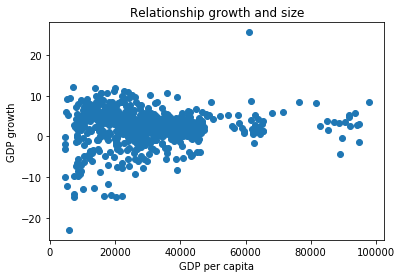

In [12]:
plt.scatter(df_wb_all.GDP_per_capita,df_wb_all.GDP_growth) #Scatterplots are a good way of visualizing relationships
plt.xlabel('GDP per capita')
plt.ylabel('GDP growth')
plt.title('Relationship growth and size')
plt.show()

In the cell above we investigate the link between economic growth and the size of the economy, based on a pattern we saw in earlier data and on expectations from economic theory. In the scatterplot there is no clear trend visible when comparing low-income and high-income countries based on the GDP growth. However, it is noticeable that low-income countries seem to have much more variation in their growth rates, with more countries having a relatively high growth rate but especially more outliers on the negative side of the growth rates. So, from the scatter plot it looks like there is more variation in the growth rate in low-income countries, but we cannot say that this will result in low-income countries persistently performing differently from high income countries. 

In [13]:
df_wb_all_corr = df_wb_all.corr() #Creating a new variable for the purpose of simplicity later on 

In [14]:
print(df_wb_all_corr.head())#Printing the correlations between the indicators

                        Corporate_transparency  Disclosure  Enforcement_cost  \
Corporate_transparency                1.000000    0.247774          0.265509   
Disclosure                            0.247774    1.000000          0.076667   
Enforcement_cost                      0.265509    0.076667          1.000000   
GDP_growth                           -0.055915    0.071200          0.047048   
GDP_per_capita                       -0.052457    0.127107         -0.326482   

                        GDP_growth  GDP_per_capita  Insolvency_framework  \
Corporate_transparency   -0.055915       -0.052457             -0.210210   
Disclosure                0.071200        0.127107              0.075534   
Enforcement_cost          0.047048       -0.326482             -0.234074   
GDP_growth                1.000000        0.041963             -0.100140   
GDP_per_capita            0.041963        1.000000             -0.120153   

                        Investor_protection  Legal_rights  Pro

# Correlations

If we want to be able to make relevant policy proposals, we must know how strong the effect will be of improving certain factors and whether they are even correlated at all. To do so, we have set up a correlation matrix of what we consider the most important indicators in the dataset in cells 14 and 15. Something that stands out is that many different indicators reflecting the strength of the countries legal framework and strength of institutions are highly correlated, meaning countries often have good institutions or they don’t, it is not expected that the quality of those indicators differ much within a country. What is probably more important is how these indicators interact with the GDP per capita and the GDP growth. One thing that stands out is the strong negative correlation between the enforcement costs and the GDP per capita. This makes sense as lower enforcement costs means that banks can operate less costly and more loans and investments can be made in a country. The previously discussed link that might exist between GDP per capita and GDP growth seems neglectable as the correlation is quite low. Another thing that stands out is the strong connection between legal rights and GDP per capita, the factors are negatively correlated as legal rights is a 0 to 12 ranking where a lower number means a better performance. A third relevant correlation is that of tax rate and GDP per capita, although it seems more likely that causation runs from high GDP per capita to higher tax rate and is therefore less relevant for policy implications to develop countries. With the final strong correlation being shareholder rights, that leaves strong policy implications for developing shareholder rights, enforcement costs and legal rights, things that a well run government should be able to improve. 

In cell 15, the same data as in cell 14 is presented, but this time the correlations are presented by colors. The same conclusions can be drawn as from cell 14 but it is easier to see. 

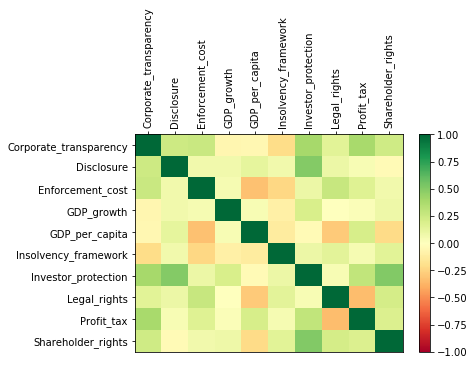

In [15]:
data = df_wb_all_corr.values #This provides us with only the numerical values of our data
fig = plt.figure() #We define fig to make it more user friendly
ax = fig.add_subplot(1,1,1) #This defines our axis, it is a two dimensional plot and it is our first one

heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn) #We want our data output to be coloured in a range from red, yellow and green
fig.colorbar(heatmap) #This provides us with a legend concerning the meaning of the colours
ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False) #This gives our heatmap a more convenient shape as it forms our colourblocks
ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False) 
ax.invert_yaxis() #
ax.xaxis.tick_top() #This puts the x-axis labels on top as to make it look more like a correlation matrix

column_labels = df_wb_all_corr.columns #Since it is a correlation matrix/heatmap, the column labels are the same as the row labels
row_labels = df_wb_all_corr.index 
ax.set_xticklabels(column_labels) #This sets the labels halfway the colourblock  in the heatmap
ax.set_yticklabels(row_labels) 
plt.xticks(rotation=90) #To make the x-labels readable we rotate them 90 degrees
heatmap.set_clim(-1,1) #Since correlation ranges from -1 to 1 we can set the limits of our heatmap ranging from -1 to 1

plt.show() 

# Regression

Finally, in the cells below we run a regression to see exactly how the different economic development indicators affect the expected GDP per capita of a country. Earlier we discussed what the correlations of different indicators might tell us, when we run the regression we see that only 3 of the regressed indicators are significant at the 10% level. The most significant is the enforcement cost, indicating how much it costs to enforce a contract. From the regression we can conclude that improving institutions and the legal framework involving the resolution of contracts,can have large benefits for the country’s GDP per capita. When banks can be assured that the legal system of the country allows it to recover a larger part of their loans, banks do not need to charge such a high risk premium on their interest rates. When the risk premium decreases, entrepreneurs and businesses can borrow funds at lower interest rates and make more investments, adding to a country’s GDP per capita. At the same time, the lower expected enforcement cost will allow banks to make loans of larger amounts, aiding the effectiveness of loans in the country. 

The 2nd most significant is investor protection, which is indicated by a score from 0 to 10 where 10 is the best score. It can be seen that a score of 1 point higher on investor protection is expected to result in an increase of GDP per capita of around 6500 dollars. The 3rd indicator with a significance level of at least 10% is shareholder rights. Share holder rights is a ranking from 0 to 12 where 0 is the best score, explaining the negative relationship between shareholder rights and expected GDP per capita. From the regression we can see that if a country manages to improve its shareholder rights 1 point, it is expected to result in an increase in GDP per capita of almost 2400 dollars. 

What is noticeable about all 3 of these indicators is that improving these indicators will primarily boost investment. Decreased enforcement costs make larger loans able for willing businesses and entrepreneurs at lower interest rates while investor protection and shareholder rights improvements will lead to more investors willing to invest in the country and offer more for company’s shares. From this regression we can conclude that a governments primary tool to increase the GDP per capita is to assure the efficient allocation of capital in the country. 


In [16]:
df_wb_all.dropna(inplace=True) #As we conclude before, a lot of indicators were lacking data. We do not want python to use this data when running a regression, so we drop the missing data

In [17]:
import statsmodels.api as sm #We need to import the statsmodels package in order to run our regression


X = df_wb_all[["Corporate_transparency","Disclosure","Enforcement_cost","Insolvency_framework","Investor_protection","Legal_rights","Profit_tax","Shareholder_rights"]]
y = df_wb_all.GDP_per_capita #The x-variables are the independent ones and the y-variable is the dependent one


model = sm.OLS(y, X).fit() #This is what our model looks like using the OLS-model estimators
predictions = model.predict(X) # We want the model to predict the x-variable coefficients as to see its effect on the GDP per capita

model.summary() #This command prints out the most important results from our model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         GDP_per_capita   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     80.09
Date:                Tue, 30 Jan 2018   Prob (F-statistic):           1.80e-44
Time:                        16:49:58   Log-Likelihood:                -1412.3
No. Observations:                 128   AIC:                             2841.
Df Residuals:                     120   BIC:                             2863.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Corporate_transparency  2229.3213   1458.128      1.529      0.129      -657.670  5116.312
Disclosure                16.8433    810.212      0.021      0.983     -1587.321  1621.007
Enforcement_cost        -526.3050    177.983     -2.957      0.004      -878.699  -173.911
Insolvency_framework     271.2274    593.796      0.457      0.649      -904.448  1446.903
Investor_protection     6568.4674   2568.477      2.557      0.012      1483.061  1.17e+04
Legal_rights            -406.8146    755.863     -0.538      0.591     -1903.371  1089.742
Profit_tax               366.7838    254.379      1.442      0.152      -136.869   870.437
Shareholder_rights     -2380.2736   1279.635     -1.860      0.065     -4913.861   153.314
==============================================================================
Omnibus:                       84.657   Durbin-Watson:                   0.516
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              472.207
Skew:                           2.353   Prob(JB):                    2.89e-103
Kurtosis:                      11.148   Cond. No.                         67.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conclusion

To summarize what we did with Python in this assignment and how we have used multiple functions of Python to gather information from the existing data we took from the World Bank: First, to quickly graphically analyze the data, we plotted the GDP per capita and the growth rate of the GDP per capita of the countries and country groups in separate graphs. When looking at the graphs we noted a difference in growth patterns and it sparked our interest whether GDP per capita might affect growth. To investigate this suspicion, we created a scatter plot where all countries are represented according to their GDP per capita and GDP per capita growth. We notice a larger variation in lower income countries but we cannot make draw any conclusions regarding the long term expected growth rates. Our next step in researching what benefits the development of countries is to look at a correlation matrix, we use this to see which factors are correlated and therefore could be interesting to for policy proposals. One thing we notice is that the before mentioned possible link between GDP per capita and the size of GDP per capita growth do not seem to be correlated. We continue by redoing the correlation matrix but this time more easily visible by having different colors representing the values. We conclude our Python research by running a regression on GDP per capita and controlling for several financial development indicators. We find 3 indicators that are significant at the 10% level, enforcement cost, investor protection and shareholder rights. All 3 indicators have high values of impact and suggests that a country’s best strategy to affect GDP per capita is to increase the efficiency in the allocation of capital, resulting in a higher investment in the country’s economy. 